In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Churn_Modelling.csv')
df = pd.DataFrame(data)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#Data Preprocessing

In [3]:
from sklearn import preprocessing
#Drop unused columns

df.drop(columns=["RowNumber","CustomerId","Surname"],
                  inplace=True)

df_clean = df.copy()


#One Hot Encoding

one_hot = pd.get_dummies(df_clean['Geography'], prefix='Geography')
df_clean = df_clean.drop('Geography', axis=1)
df_clean = df_clean.join(one_hot)

#Label Encoding
df_clean['Gender']=df_clean['Gender'].map({'Male':1,'Female':0})


In [4]:
df_clean

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0,1,0


#Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler
cols = ["CreditScore","Age","Tenure","Balance","EstimatedSalary","NumOfProducts","HasCrCard","IsActiveMember","Gender","Geography_France","Geography_Germany","Geography_Spain"]
df_clean[cols] = StandardScaler().fit_transform(df_clean[cols])

# Train and Test Split

In [6]:
from sklearn.model_selection import train_test_split

y = df_clean["Exited"]
x = df_clean.drop(columns=["Exited"], inplace=False)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)
print("train data")
print(pd.DataFrame(x_train).shape)
print(pd.DataFrame(y_train).shape)
print("")
print("test data")
print(pd.DataFrame(x_test).shape)
print(pd.DataFrame(y_test).shape)

train data
(6000, 12)
(6000, 1)

test data
(4000, 12)
(4000, 1)


#Under Sampling

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

under_sampling = RandomUnderSampler(random_state=0)
x_train_resampled, y_train_resampled = under_sampling.fit_sample(x_train, y_train)

print("before undersampling")
print(pd.DataFrame(y_train).value_counts().rename_axis(index=None).sort_index())
print("after undersampling")
print(pd.DataFrame(y_train_resampled).value_counts().sort_index())

before undersampling
0    4773
1    1227
dtype: int64
after undersampling
0    1227
1    1227
dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


#KNN

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train_resampled, y_train_resampled)
y_pred_knn = knn.predict(x_test)
pred_prob_knn = knn.predict_proba(x_test)

#Random Forest Classifier

In [9]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train_resampled, y_train_resampled)
y_pred_rfc = rfc.predict(x_test)
pred_prob_rfc = rfc.predict_proba(x_test)

#Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train_resampled, y_train_resampled)
y_pred_logreg=logreg.predict(x_test)
pred_prob_logreg = logreg.predict_proba(x_test)

In [11]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr_knn, tpr_knn, thresh_knn = roc_curve(y_test, pred_prob_knn[:,1], pos_label=1)
fpr_rfc, tpr_rfc, thresh_rfc = roc_curve(y_test, pred_prob_rfc[:,1], pos_label=1)
fpr_logreg, tpr_logreg, thresh_logreg = roc_curve(y_test, pred_prob_logreg[:,1], pos_label=1)

In [12]:
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [13]:

from sklearn.metrics import roc_auc_score

# auc scores
auc_score_knn = roc_auc_score(y_test, pred_prob_knn[:,1])
auc_score_rfc = roc_auc_score(y_test, pred_prob_rfc[:,1])
auc_score_logreg = roc_auc_score(y_test, pred_prob_logreg[:,1])

In [ ]:
print(auc_score_knn,auc_score_rfc,auc_score_logreg)

0.7558202716823407 0.845994814040791 0.7659715933279152


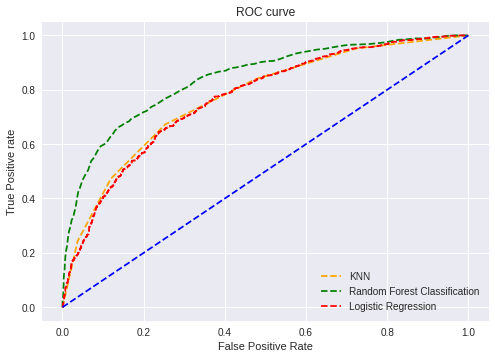

In [14]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr_knn, tpr_knn, linestyle='--',color='orange', label='KNN')
plt.plot(fpr_rfc, tpr_rfc, linestyle='--',color='green', label='Random Forest Classification')
plt.plot(fpr_logreg, tpr_logreg, linestyle='--',color='red', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

#Test Model Stability

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

#Random Forest Classification

In [16]:
rfc_cv_score = cross_val_score(rfc, x, y, cv=10, scoring='roc_auc')

In [ ]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred_rfc))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred_rfc))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[3081  109]
 [ 442  368]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      3190
           1       0.77      0.45      0.57       810

    accuracy                           0.86      4000
   macro avg       0.82      0.71      0.74      4000
weighted avg       0.85      0.86      0.85      4000



=== All AUC Scores ===
[0.8626558  0.83050978 0.87406395 0.83642477 0.86230786 0.84265383
 0.85066571 0.87070047 0.85530097 0.84136633]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.8526649479577604


#Tuning Hyperparameter



In [17]:
from sklearn.model_selection import RandomizedSearchCV
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# number of features at every split
max_features = ['auto', 'sqrt']

# max depth
max_depth = [int(x) for x in np.linspace(100, 500, num = 11)]
max_depth.append(None)
# create random grid
random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth
 }
# Random search of parameters
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the model
rfc_random.fit(x_train_resampled, y_train_resampled)
# print results
print(rfc_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 13.9min finished


{'n_estimators': 1400, 'max_features': 'sqrt', 'max_depth': 260}


In [18]:
rfc = RandomForestClassifier(n_estimators=1400, max_depth=260, max_features='sqrt')
rfc.fit(x_train_resampled,y_train_resampled)
rfc_predict = rfc.predict(x_test)
rfc_predict_proba = rfc.predict_proba(x_test)
rfc_cv_score = cross_val_score(rfc, x, y, cv=10, scoring='roc_auc')
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[2488  702]
 [ 207  603]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.92      0.78      0.85      3190
           1       0.46      0.74      0.57       810

    accuracy                           0.77      4000
   macro avg       0.69      0.76      0.71      4000
weighted avg       0.83      0.77      0.79      4000



=== All AUC Scores ===
[0.86287134 0.83987031 0.87831313 0.84009816 0.86808121 0.84429808
 0.8542498  0.86941486 0.8609317  0.84280337]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.8560931975485886


#Logistic Regression

In [19]:
logreg_cv_score = cross_val_score(logreg, x, y, cv=10, scoring='roc_auc')

In [20]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred_logreg))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred_logreg))
print('\n')
print("=== All AUC Scores ===")
print(logreg_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Logistic Regression: ", logreg_cv_score.mean())

=== Confusion Matrix ===
[[2205  985]
 [ 239  571]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.90      0.69      0.78      3190
           1       0.37      0.70      0.48       810

    accuracy                           0.69      4000
   macro avg       0.63      0.70      0.63      4000
weighted avg       0.79      0.69      0.72      4000



=== All AUC Scores ===
[0.79331708 0.76969406 0.77925165 0.74806015 0.7548958  0.79066287
 0.75975466 0.77654505 0.75104919 0.73704965]


=== Mean AUC Score ===
Mean AUC Score - Logistic Regression:  0.7660280162012332


#Tuning Hyperparameter

In [21]:
from sklearn.model_selection import RandomizedSearchCV
#List Hyperparameters yang akan diuji
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l1','l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)

# Random search of parameters
logreg_random = RandomizedSearchCV(estimator = logreg, param_distributions = grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the model
logreg_random.fit(x_train_resampled, y_train_resampled)
# print results
print(logreg_random.best_params_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 30 is smaller than n_iter=100. Running 30 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'solver': 'newton-cg', 'penalty': 'l2', 'C': 0.01}


[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.4s finished


In [22]:
logreg = LogisticRegression(solver='newton-cg',penalty='l2',C=0.01)
logreg.fit(x_train_resampled,y_train_resampled)
logreg_predict = logreg.predict(x_test)
logreg_predict_proba = logreg.predict_proba(x_test)
logreg_cv_score = cross_val_score(logreg, x, y, cv=10, scoring='roc_auc')
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred_logreg))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred_logreg))
print('\n')
print("=== All AUC Scores ===")
print(logreg_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Logistic Regression: ", logreg_cv_score.mean())

=== Confusion Matrix ===
[[2205  985]
 [ 239  571]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.90      0.69      0.78      3190
           1       0.37      0.70      0.48       810

    accuracy                           0.69      4000
   macro avg       0.63      0.70      0.63      4000
weighted avg       0.79      0.69      0.72      4000



=== All AUC Scores ===
[0.79295374 0.76914597 0.77912849 0.74903931 0.75556705 0.79117401
 0.76041975 0.77690972 0.75216792 0.73825491]


=== Mean AUC Score ===
Mean AUC Score - Logistic Regression:  0.7664760864370639


#KNN

In [23]:
knn_cv_score = cross_val_score(knn, x, y, cv=10, scoring='roc_auc')

In [24]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred_knn))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred_knn))
print('\n')
print("=== All AUC Scores ===")
print(knn_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - KNN: ", knn_cv_score.mean())

=== Confusion Matrix ===
[[2381  809]
 [ 265  545]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      3190
           1       0.40      0.67      0.50       810

    accuracy                           0.73      4000
   macro avg       0.65      0.71      0.66      4000
weighted avg       0.80      0.73      0.75      4000



=== All AUC Scores ===
[0.78929266 0.74830956 0.80487918 0.78057259 0.7902164  0.74685314
 0.7654264  0.77746599 0.75149112 0.76400727]


=== Mean AUC Score ===
Mean AUC Score - KNN:  0.7718514310999379


#Tuning Hyperparameter

In [25]:
from sklearn.model_selection import RandomizedSearchCV
#List Hyperparameters yang akan diuji
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]

# define grid search
grid = dict(leaf_size=leaf_size,n_neighbors=n_neighbors,p=p)

# Random search of parameters
knn_random = RandomizedSearchCV(estimator = knn, param_distributions = grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the model
knn_random.fit(x_train_resampled, y_train_resampled)
# print results
print(knn_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    4.4s


{'p': 1, 'n_neighbors': 5, 'leaf_size': 47}


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   18.5s finished


In [26]:
knn = KNeighborsClassifier(p=1,n_neighbors=5,leaf_size=47)
knn.fit(x_train_resampled,y_train_resampled)
knn_predict = knn.predict(x_test)
knn_predict_proba = knn.predict_proba(x_test)
knn_cv_score = cross_val_score(knn, x, y, cv=10, scoring='roc_auc')
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred_knn))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred_knn))
print('\n')
print("=== All AUC Scores ===")
print(knn_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - KNN: ", knn_cv_score.mean())

=== Confusion Matrix ===
[[2381  809]
 [ 265  545]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      3190
           1       0.40      0.67      0.50       810

    accuracy                           0.73      4000
   macro avg       0.65      0.71      0.66      4000
weighted avg       0.80      0.73      0.75      4000



=== All AUC Scores ===
[0.7858071  0.74558762 0.79319391 0.79480737 0.77888831 0.74283489
 0.75703887 0.780748   0.77277784 0.77105958]


=== Mean AUC Score ===
Mean AUC Score - KNN:  0.7722743491693802


In [27]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr_knn, tpr_knn, thresh_knn = roc_curve(y_test, knn_predict_proba[:,1], pos_label=1)
fpr_rfc, tpr_rfc, thresh_rfc = roc_curve(y_test, rfc_predict_proba[:,1], pos_label=1)
fpr_logreg, tpr_logreg, thresh_logreg = roc_curve(y_test, logreg_predict_proba[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

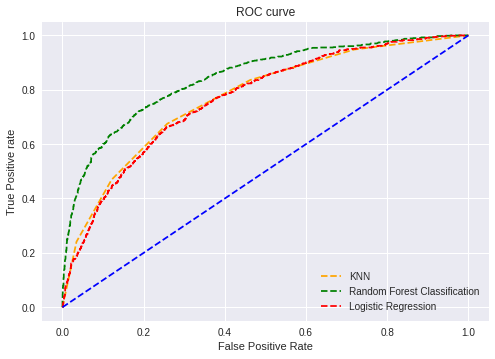

In [28]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr_knn, tpr_knn, linestyle='--',color='orange', label='KNN')
plt.plot(fpr_rfc, tpr_rfc, linestyle='--',color='green', label='Random Forest Classification')
plt.plot(fpr_logreg, tpr_logreg, linestyle='--',color='red', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();